In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.votable import parse
import pandas as pd
from astropy.coordinates import Angle , SkyCoord
from astropy import units as u
import seaborn as sns
from matplotlib.patches import Ellipse
from astropy.table import Table
def votable_to_pandas(votable_file):
    votable = parse(votable_file)
    table = votable.get_first_table().to_table()
    return table.to_pandas()

###data

In [3]:
newdf = pd.read_csv('/content/drive/MyDrive/thesis_final_results/gaia_hermes_cross_sample.csv')

In [4]:
dec = np.radians(newdf['dec'])
ra = np.radians(newdf['ra'])
parallax = newdf['parallax']
v_r = newdf['rv']
v_t = newdf['dist']/1000
mu_alpha = newdf['pmra']
mu_delta = newdf['pmdec']

In [ ]:
'''
galactic rotation and solar motion correction
'''
delta_g = np.radians(27.12825)
I_omega = np.radians(32.93192)
alpha_g = np.radians(192.85948)

'''
uncertainties in longitude and lattitude are not available? Use ICRS to convert to galactic coord and then use those uncertainties
'''
l_rad = np.radians(newdf['l'])
b_rad = np.radians(newdf['b'])
'''
Alternatively use astropy skycoordinates as in galactic coord section
b_test = z.b.deg
l_test = z.l.deg
'''
sinb = np.sin(np.radians(newdf['b']))
cosb = np.cos(np.radians(newdf['b']))
cos_psi =- (np.cos(delta_g)*np.sin(dec)*np.cos(alpha_g-ra) - np.sin(delta_g)*np.sin(dec))/cosb
sin_psi = np.cos(delta_g)*np.sin(alpha_g-ra)/cosb

mu_l = mu_alpha*cos_psi - mu_delta*sin_psi
mu_b = mu_alpha*sin_psi + mu_delta*cos_psi

k = 4.74
u_sol = 11.1
r_0 = 8.27
v_0 = 238
v_sol= 12.24
w_sol =7.25

r = np.array(newdf['vt'])/10**3 # problem was here??? it's a variable!

mu_l_sol = (u_sol*np.sin(l_rad) -v_sol*np.cos(l_rad))/(k*r)
mu_b_sol = (u_sol*np.cos(l_rad)*sinb + v_sol*np.sin(l_rad)*sinb - w_sol*cosb)/(k*r)

big_r = np.sqrt(r_0**2 + (r**2)*(cosb**2) - 2*r*r_0*cosb*np.cos(l_rad))
omega = v_0/big_r
omega_0 = v_0/r_0

mu_l_rot = ((r_0/(r*cosb))*(omega-omega_0)*np.cos(l_rad) - omega )/k
mu_b_rot = - (r_0/r)*(omega-omega_0)*sinb*np.sin(l_rad)/k
mu_l_pec = mu_l - mu_l_sol - mu_l_rot
mu_b_pec = mu_b - mu_b_sol - mu_b_rot

v_t_pec =  k*r*np.sqrt(mu_b_pec**2 + mu_l_pec **2)
v_r_sol = - u_sol*np.cos(l_rad)*cosb - v_sol*np.sin(l_rad)*cosb - w_sol*sinb
v_r_rot = r_0*(omega-omega_0)*cosb*np.sin(l_rad)
v_r_pec = v_r - v_r_sol - v_r_rot
v_tot = np.sqrt(v_r_pec**2 + v_t_pec**2)

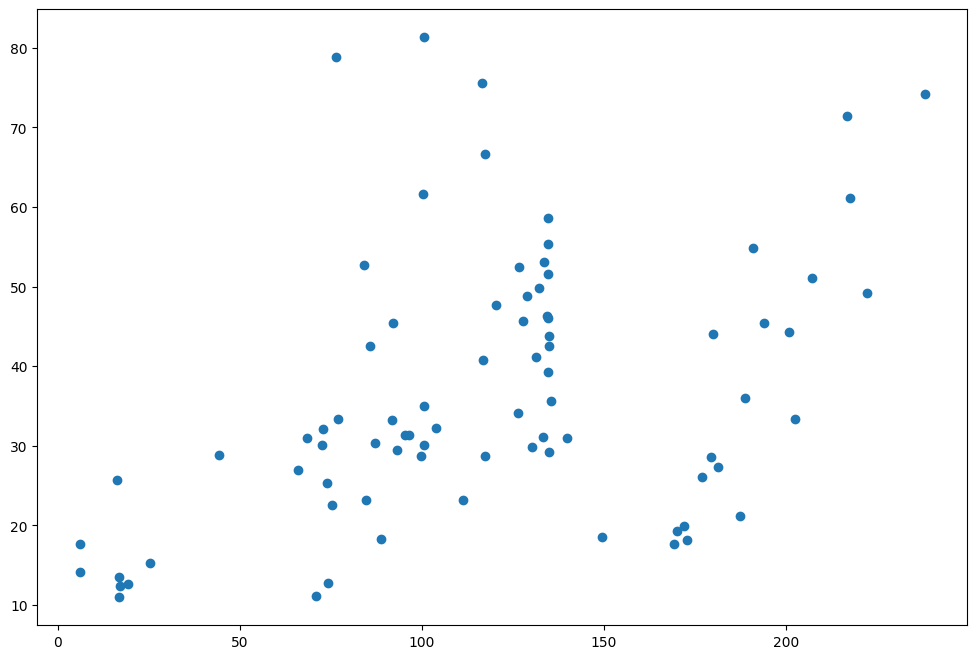

In [ ]:
plt.figure(figsize = [12,8])
plt.scatter(newdf['l'], v_tot)

### uncertainties


In [ ]:
!pip install uncertainties
from uncertainties import unumpy as unp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 5.3 MB/s eta 0:00:00


In [ ]:
ra = np.radians(newdf['ra'])
dec = np.radians(newdf['dec'])
parallax = newdf['parallax']
v_r = newdf['rv']
v_t = newdf['dist']/1000
mu_alpha = newdf['pmra']
mu_delta = newdf['pmdec']
r = newdf['vt']/10**3

k = 4.74
u_sol = 11.1  # +/- 0.75
r_0 = 8.27 # +/- 0.29
v_0 = 238 # +/- 9
v_sol= 12.24 # +/- 0.47
w_sol =7.25 # +/- 0.37


ra_err = np.radians(newdf['ra_error'])
dec_err = np.radians(newdf['dec_error'])
parallax_err = newdf['parallax_error']
v_r_err = newdf['rv_error']
v_t_err = (newdf['dist_max'] - newdf['dist_min'])/(2*1000)
mu_alpha_err = newdf['pmra_error']
mu_delta_err = newdf['pmdec_error']
r_err = (newdf['vt_max']-newdf['vt_min'])/(2*10**3)

u_sol_err = 0.75
r_0_err = 0.29
v_0_err = 9
v_sol_err = 0.47
w_sol_err = 0.37


ra = unp.uarray(( ra, ra_err ))
dec = unp.uarray(( dec, dec_err ))
parallax = unp.uarray((parallax, parallax_err))
v_r = unp.uarray((v_r, v_r_err))
v_t = unp.uarray((v_t, v_t_err))
mu_alpha = unp.uarray((mu_alpha, mu_alpha_err))
mu_delta = unp.uarray((mu_delta, mu_delta_err))
r = unp.uarray((r, r_err))

u_sol_err = unp.uarray((u_sol, u_sol_err))
r_0_err = unp.uarray((r_0, r_0_err))
v_0_err = unp.uarray((v_0, v_0_err))
v_sol_err = unp.uarray((v_sol, v_sol_err))
w_sol_err = unp.uarray((w_sol, w_sol_err))


<ipython-input-8-bf54e0913cad>:34: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  ra = unp.uarray(( ra, ra_err ))
<ipython-input-8-bf54e0913cad>:35: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  dec = unp.uarray(( dec, dec_err ))
<ipython-input-8-bf54e0913cad>:36: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  parallax = unp.uarray((parallax, parallax_err))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)
<ipython-input-8-bf54e0913cad>:37: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be a

In [ ]:
'''
galactic rotation and solar motion correction
'''
delta_g = np.radians(27.12825)
I_omega = np.radians(32.93192)
alpha_g = np.radians(192.85948)

'''
uncertainties in longitude and lattitude are not available? Use ICRS to convert to galactic coord and then use those uncertainties
'''
l_rad = np.radians(newdf['l'])
b_rad = np.radians(newdf['b'])
'''
Alternatively use astropy skycoordinates as in galactic coord section
b_test = z.b.deg
l_test = z.l.deg
'''
sinb = np.sin(np.radians(newdf['b']))
cosb = np.cos(np.radians(newdf['b']))
cos_psi =- (np.cos(delta_g)*unp.sin(dec)*unp.cos(alpha_g-ra) - np.sin(delta_g)*unp.sin(dec))/cosb
sin_psi = np.cos(delta_g)*unp.sin(alpha_g-ra)/cosb

mu_l = mu_alpha*cos_psi - mu_delta*sin_psi
mu_b = mu_alpha*sin_psi + mu_delta*cos_psi

#r = np.array(newdf['vt'])/10**3 # problem was here??? it's a variable!

mu_l_sol = (u_sol*np.sin(l_rad) -v_sol*np.cos(l_rad))/(k*r)
mu_b_sol = (u_sol*np.cos(l_rad)*sinb + v_sol*np.sin(l_rad)*sinb - w_sol*cosb)/(k*r)

big_r = unp.sqrt(r_0**2 + (r**2)*(cosb**2) - 2*r*r_0*cosb*np.cos(l_rad))
omega = v_0/big_r
omega_0 = v_0/r_0

mu_l_rot = ((r_0/(r*cosb))*(omega-omega_0)*np.cos(l_rad) - omega )/k
mu_b_rot = - (r_0/r)*(omega-omega_0)*sinb*np.sin(l_rad)/k
mu_l_pec = mu_l - mu_l_sol - mu_l_rot
mu_b_pec = mu_b - mu_b_sol - mu_b_rot

v_t_pec =  k*r*unp.sqrt(mu_b_pec**2 + mu_l_pec **2)
v_r_sol = - u_sol*np.cos(l_rad)*cosb - v_sol*np.sin(l_rad)*cosb - w_sol*sinb
v_r_rot = r_0*(omega-omega_0)*cosb*np.sin(l_rad)
v_r_pec = v_r - v_r_sol - v_r_rot
v_tot = unp.sqrt(v_r_pec**2 + v_t_pec**2)

In [ ]:
space_vel = unp.nominal_values(v_tot)
space_vel_err = unp.std_devs(v_tot)

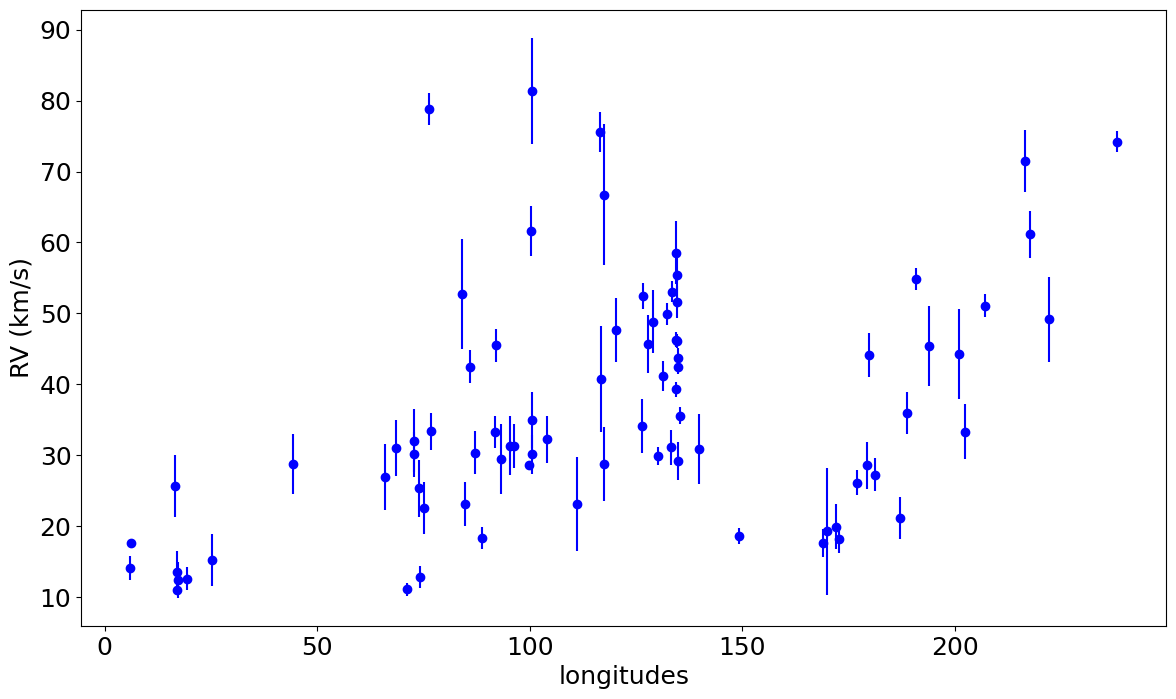

In [ ]:
plt.figure(figsize = [14,8])
plt.errorbar(newdf['l'], space_vel, yerr= space_vel_err, fmt = 'o', color = 'b' )
plt.xlabel('longitudes', size = 18)
plt.ylabel('RV (km/s)', size = 18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.savefig('runaways.png', transparent=True)

### to csv

In [ ]:
arr = {'vels': space_vel, 'err': space_vel_err}
df = Table(arr).to_pandas()
df = df.dropna().reset_index()
p = 1/len(df['vels'])
probability = []
observed = []
for i in range(0, len(df['vels'])):
  observed.append('obs')
  probability.append(p)
df['src'] = np.array(observed)
df['prob'] = np.array(probability)

In [ ]:
df.to_csv('space_vels.csv')

### results

In [ ]:
newdf['vs'] = space_vel
newdf['vs_err'] = space_vel_err
newdf['vt_pec'] = unp.nominal_values(v_t_pec)

In [ ]:
#get rid of nan values
import math
index = []
for i in range(0,len(space_vel)):
  if space_vel_err[i] > 0.0000001: index.append(i)
  else: pass
data = newdf.iloc[index].reset_index()

In [ ]:
success = []
failure = []
for k in range(0, len(data['ra'])):
  rv = np.random.default_rng().normal(data['vs'][k], data['vs_err'][k], 10000)
  count = np.count_nonzero(rv > 50)
  success.append(count)
  failure.append(10000-count)
data['runaway_prob'] = np.array(success)/10000

count = np.count_nonzero(np.array(success)/10000 >0.90)
print('number of runaways with >90% runaway probability : ', count)
print('runaway fraction with 90% probability : ', count/len(data['name']))

total_prob = np.sum(np.array(data['runaway_prob']))
print('runaway_fraction is : ', 100*total_prob/len(data['runaway_prob']))

#name of the runaway stars
names = []
index = []   # index loc of runaways
for i in range(0, len(data['name'])):
  if data['runaway_prob'][i]>0.9:
    names.append(data['name'][i])
    index.append(i)

number of runaways with >90% runaway probability :  13
runaway fraction with 90% probability :  0.16049382716049382
runaway_fraction is :  21.308888888888887


(array([  1.,   5.,  19.,  84., 212., 260., 219., 131.,  49.,  20.]),
 array([0.14814815, 0.16049383, 0.17283951, 0.18518519, 0.19753086,
        0.20987654, 0.22222222, 0.2345679 , 0.24691358, 0.25925926,
        0.27160494]),
 <BarContainer object of 10 artists>)

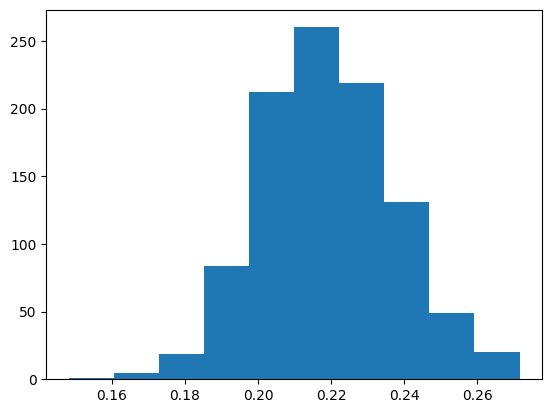

In [ ]:
#total runaway fraction from monte carlo
frac = []

for i in range(0,1000):
  rv_iter = []
  for k in range(0, len(data['name'])):
    rv_iter.append(np.random.normal(loc = data['vs'][k], scale= data['vs_err'][k]))
  count = np.count_nonzero(np.array(rv_iter) > 50)
  frac.append(count/len(data['name']))

plt.hist(frac, bins =10)

In [ ]:
run = data.iloc[index]

In [ ]:
run['pmdec']

2    -3.316562
4     1.819158
12   -9.815009
25    0.145634
27   -1.946043
32   -0.834410
35   -1.362814
43   -1.443101
52   -1.085534
54   -4.019022
58   -1.687045
59    0.354545
67   -0.474648
Name: pmdec, dtype: float64

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90'),
  Text(0, 100.0, '100')])

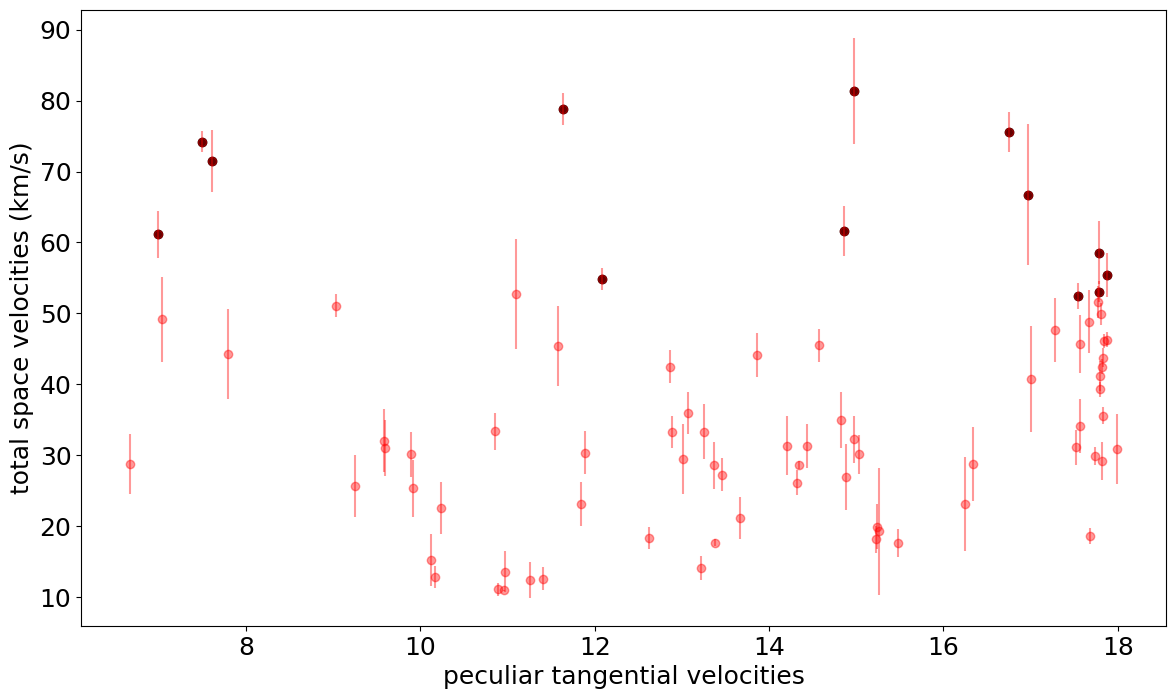

In [ ]:
plt.figure(figsize = [14,8])
plt.errorbar(unp.nominal_values(v_t_pec), space_vel, yerr= space_vel_err, fmt = 'o', color = 'r', alpha = 0.4 )
plt.scatter(run['vt_pec'], run['vs'], color = 'black', alpha = 1)
plt.xlabel('peculiar tangential velocities', size = 18)
plt.ylabel('total space velocities (km/s)', size = 18)
plt.xticks(size=18)
plt.yticks(size=18)

###Runaway Tracing

In [ ]:
run['name']
dist_vel = pd.read_csv('/content/full_distance_velocities')
df = run.merge(dist_vel, how = 'inner', on = 'name')
df['pmra_10Myr'] = np.array(df['pmra'])*2.777
df['pmdec_10Myr'] = np.array(df['pmdec'])*2.777


In [ ]:
clean = pd.DataFrame()
clean['name'] = df['name']
clean['len'] = np.sqrt(np.array(df['pmra_10Myr'])**2 + np.array(df['pmdec_10Myr'])**2)
clean['rv'] = df['rv']
clean['distance_low'] = df['dist68_lower']
clean['distance_high'] = df['dist68_upper']
clean['angle_low'] = np.array(df['angle68_lower']) - 180
clean['angle_high'] = np.array(df['angle68_upper']) -180

In [ ]:
!pip install galpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.2 MB/s eta 0:00:00


In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
from galpy.orbit import Orbit
from astropy.coordinates import CartesianDifferential
from galpy.potential import MWPotential2014, LogarithmicHaloPotential

In [ ]:
run = run.reset_index()
run[:2]

####initializing one object

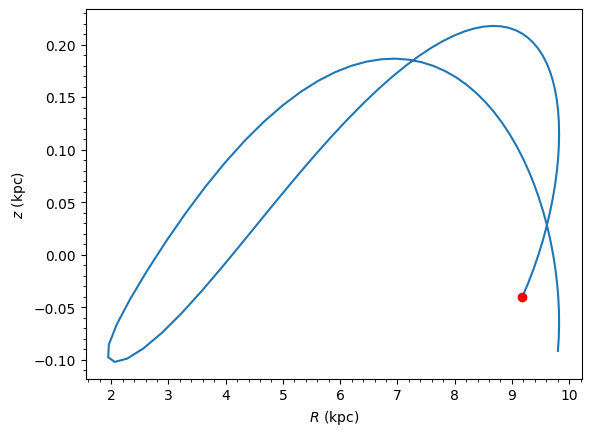

In [ ]:
c= SkyCoord(ra=run['ra'][0]*u.deg,dec=run['dec'][0]*u.deg,distance=run['dist'][0]*u.pc,
                pm_ra_cosdec=-run['pmra'][0]*u.mas/u.yr,pm_dec=-run['pmdec'][0]*u.mas/u.yr,
                radial_velocity=-run['rv'][0]*u.km/u.s)
lp= LogarithmicHaloPotential()
o = Orbit(c)
ts= np.linspace(0.,100.,100)*u.Myr
o.integrate(ts,MWPotential2014+lp)
o.plot([o.R()],[o.z()],'ro')

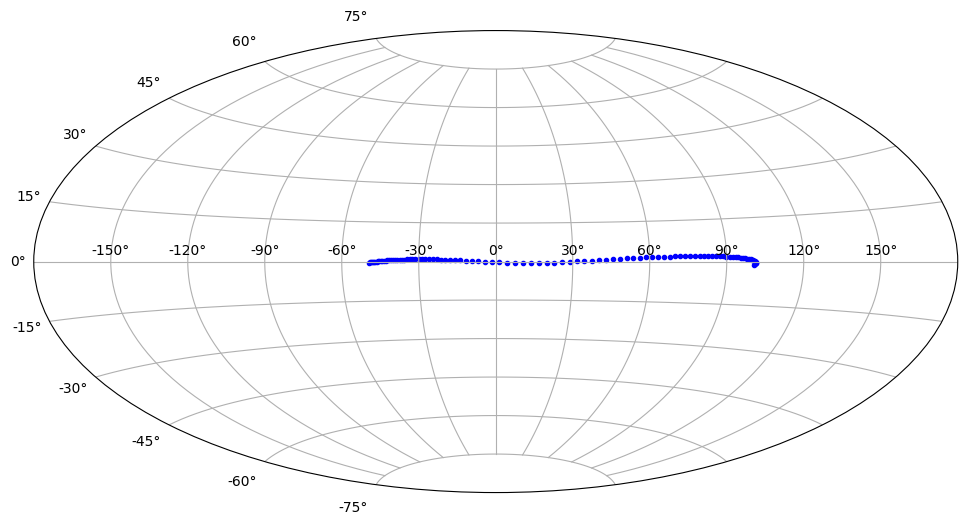

In [ ]:
c = SkyCoord(ra=Angle(o.ra(ts), unit=u.deg), dec=Angle(o.dec(ts), unit=u.deg), frame = 'icrs')
z = c.transform_to(frame = 'galactic')
l_rad_plt = z.l.rad
l_rad_plt[l_rad_plt > np.pi] -= 2. * np.pi
b_rad = z.b.rad

fig = plt.figure(figsize = [12,6])
ax = fig.add_subplot(1,1,1, projection='aitoff')
ax.scatter(l_rad_plt, b_rad, color='b', marker= '.')
ax.grid()
plt.show()

#### initializing multiple object

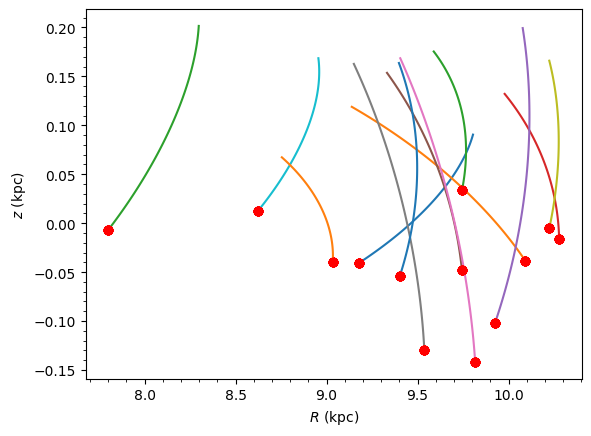

In [ ]:
c= SkyCoord(ra=np.array(run['ra'])*u.deg,dec=np.array(run['dec'])*u.deg,distance=np.array(run['dist'])*u.pc,
                pm_ra_cosdec=-np.array(run['pmra'])*u.mas/u.yr,pm_dec=-np.array(run['pmdec'])*u.mas/u.yr,
                radial_velocity=-np.array(run['rv'])*u.km/u.s)
lp= LogarithmicHaloPotential()
o = Orbit(c)
ts= np.linspace(0.,10.,100)*u.Myr
o.integrate(ts,MWPotential2014+lp)
o.plot([o.R()],[o.z()],'ro')

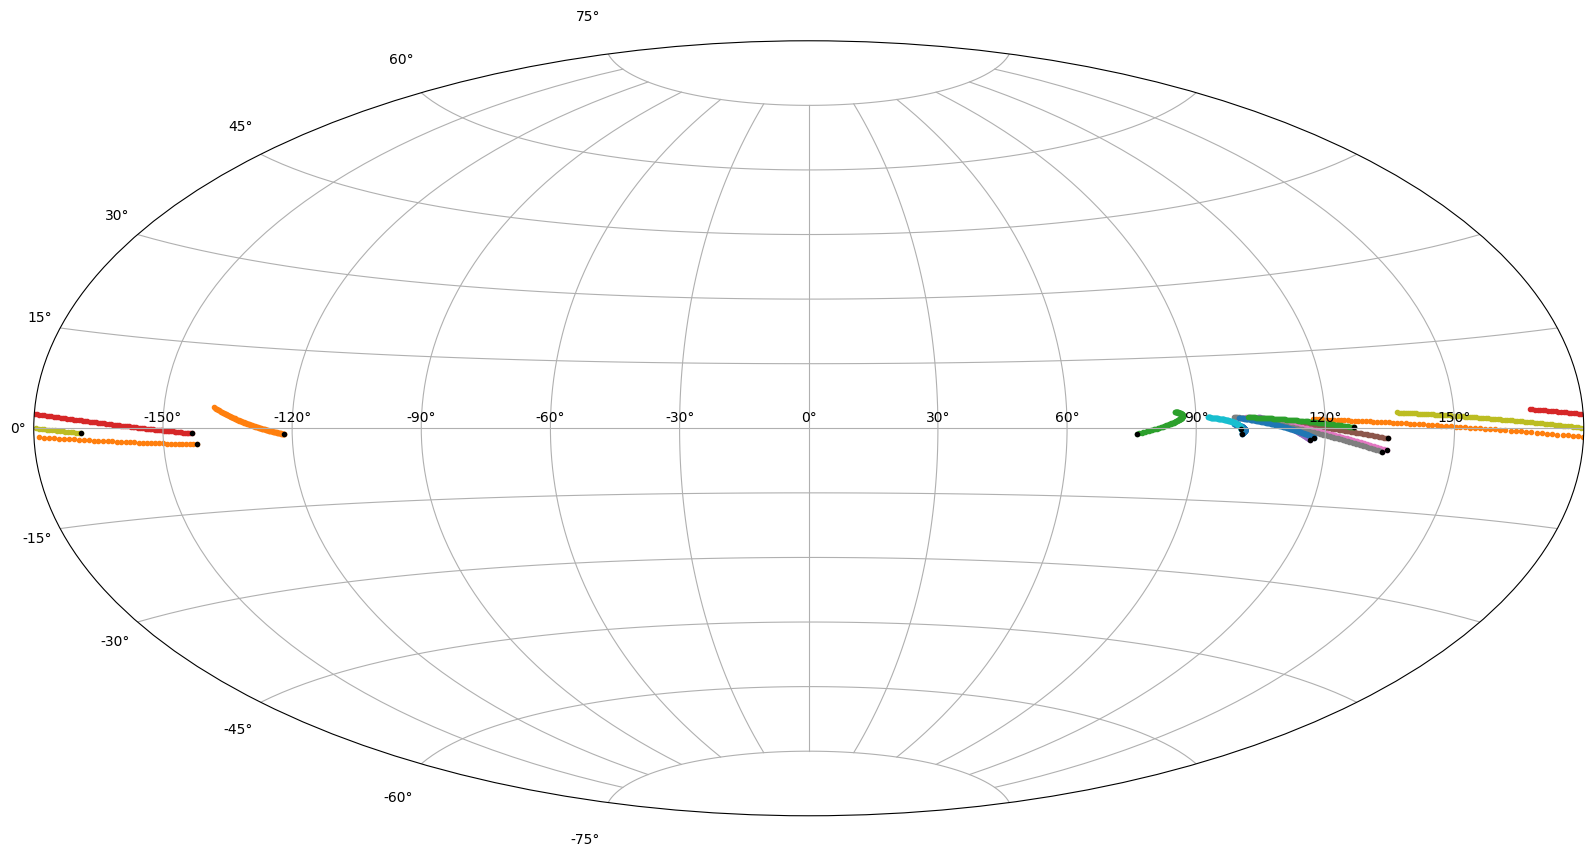

In [ ]:
c = SkyCoord(ra=Angle(o.ra(ts), unit=u.deg), dec=Angle(o.dec(ts), unit=u.deg), frame = 'icrs')
z = c.transform_to(frame = 'galactic')
l_rad_plt = z.l.rad
l_rad_plt[l_rad_plt > np.pi] -= 2. * np.pi
b_rad = z.b.rad
################################################

c_org = SkyCoord(ra=Angle(run['ra'], unit=u.deg), dec=Angle(run['dec'], unit=u.deg), frame = 'icrs')
z_org = c_org.transform_to(frame = 'galactic')
l_rad_plt_org = z_org.l.rad
l_rad_plt_org[l_rad_plt_org > np.pi] -= 2. * np.pi
b_rad_org = z_org.b.rad

################################################

fig = plt.figure(figsize = [20,20])
ax = fig.add_subplot(1,1,1, projection='aitoff')

for i in range(0, len(l_rad_plt)):
    ax.scatter(l_rad_plt[i], b_rad[i], marker= '.')
ax.scatter(l_rad_plt_org, b_rad_org, marker= '.', color = 'black')
ax.grid()
plt.show()